# TD2

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, probplot

## Exercise 1

### Data loading

In [71]:
myFile = 'Projectdata.txt'
vX = np.loadtxt(myFile)

### 1.1 

In [72]:
mean_est = np.mean(vX)
std_est = np.std(vX)
print('ratio mean/standard deviation: {:f}'.format(mean_est/std_est))

ratio mean/standard deviation: 1.025979


### 1.2

In [73]:
lambda_est = 1/mean_est
print('estimated lambda: {:e}'.format(lambda_est))

estimated lambda: 3.000000e-05


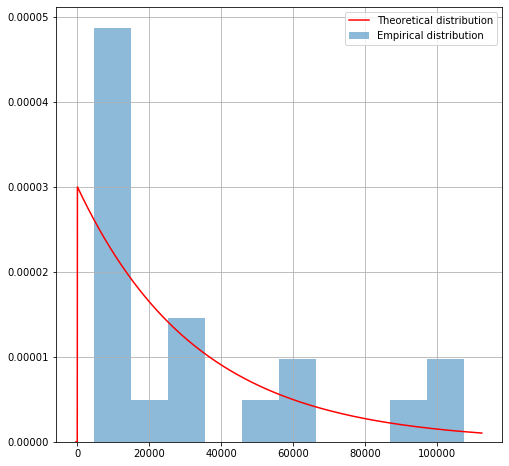

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(vX, density=True, alpha=0.5, label='Empirical distribution')
xlim = ax.get_xlim()
vx = np.arange(xlim[0], xlim[1], 50)
vy = expon.pdf(vx, scale=1/lambda_est)
ax.plot(vx, vy, 'r', label='Theoretical distribution')
ax.grid(True)
ax.legend(loc='upper right')

## Exercise 2

### Data loading

In [75]:
myFile = 'Projectdata.txt'
vX = np.loadtxt(myFile)

### 2.1 and 2.2

In [76]:
lambda_est = 1/np.mean(vX)

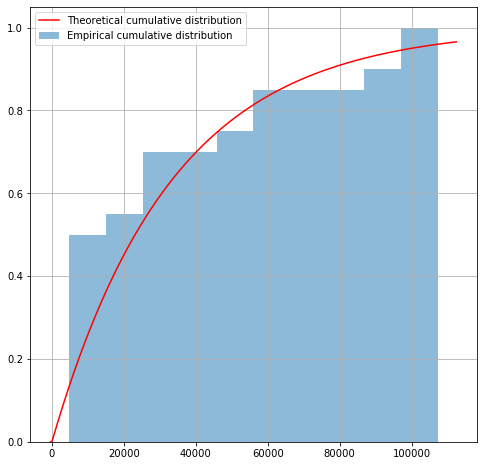

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.hist(vX, density=True, cumulative=True, alpha = 0.5,
        label='Empirical cumulative distribution')
xlim = ax.get_xlim()
vx = np.arange(xlim[0], xlim[1], 50)
vy = expon.cdf(vx, scale=1/lambda_est)
ax.plot(vx, vy, 'r', label='Theoretical cumulative distribution')
ax.grid(True)
ax.legend(loc='upper left')

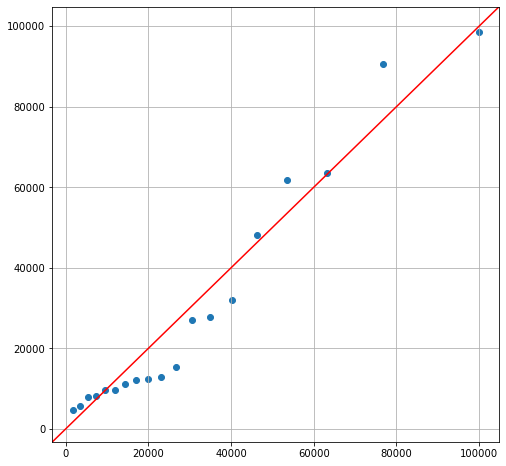

In [110]:
# see statsmodels.api for direct QQ-plot
vX = np.sort(vX)
vQt = np.zeros(vX.shape)
for idx in range(len(vX)):
    vQt[idx] = expon.ppf((idx+1)/len(vX), scale=1/lambda_est)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(vQt, vX)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
lim = [np.min([xlim[0], ylim[0]]), np.max([xlim[1], ylim[1]])]
ax.plot(lim, lim, 'r')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.grid(True)

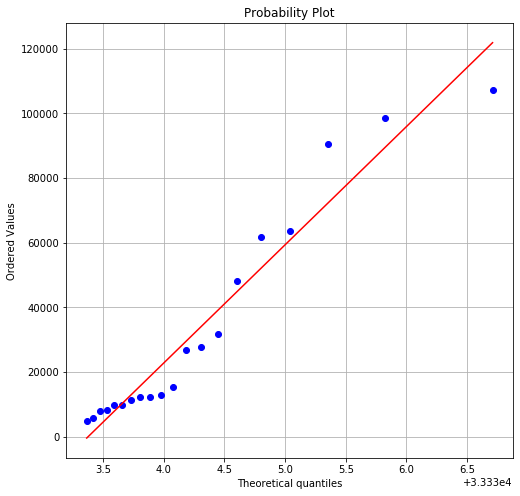

In [80]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html?highlight=probplot#scipy.stats.probplot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
probplot(vX, dist=expon, sparams=(1/lambda_est), plot=ax)
ax.grid(True)

## Exercise 3

In [63]:
vX = np.array([31.7, 39.2, 57.5, 65.8, 70.0, 101.7, 109.2, 130.0])